In [1]:
%load_ext autoreload
%autoreload complete

In [2]:
from src.data.protests import (
    aggregate_protests,
    get_climate_protests,
    get_climate_queries,
)
from src.models.synthetic_region import get_regional_count_df

protests = get_climate_protests(groups=["fff", "alg", "xr"])
protests = aggregate_protests(protests)
protests = protests.query("size > 0")
queries = get_climate_queries()

In [27]:
import numpy as np
import pandas as pd

df = protests.copy()


def get_discourse_change(row, day=0):
    ts = get_regional_count_df(
        region=row["admin1"], query_string=queries["climate"][0], source="mediacloud"
    )
    pre_week = ts[ts["date"] < row["event_date"]]["count"].iloc[-1:]
    post_week = ts[ts["date"] >= row["event_date"]]["count"].iloc[:3]
    event_day = ts[ts["date"] >= row["event_date"]]["count"].iloc[day]
    if pre_week.mean() == 0:
        return np.nan
    return event_day - pre_week.mean()

312
310


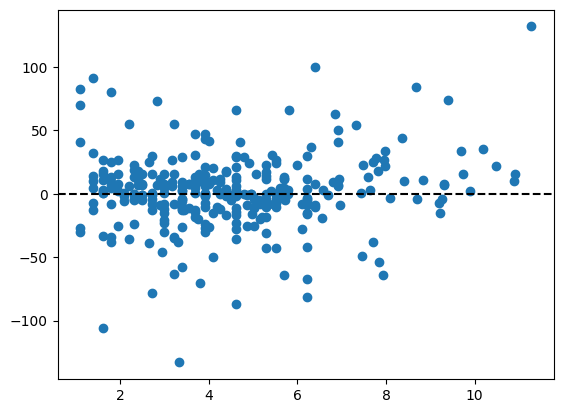

In [28]:
from functools import partial

df["impact"] = df.apply(partial(get_discourse_change, day=0), axis=1)
print(len(df))
df = df[~df["impact"].isna()]
print(len(df))

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(np.log(df["size"]), df["impact"])
plt.axhline(0, color="black", linestyle="--")